In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
def plot_crossover_and_mutation(
    data: pd.DataFrame,
    optimum: int,
    y_upper_lim: int,
    crossover_text_y: int,
    color: str,
):
    fig, ax = plt.subplots(figsize=(13, 8))

    sns.boxplot(
        data=data,
        x="crossover_mutation",
        y="bestFitness",
        hue="crossover_mutation",
        fill=False,
        gap=0.1,
        ax=ax,
        color=color,
        legend=False,
    )
    # Customize the plot
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    # ax.axhline(19569, color='black', linestyle='--', alpha=0.5)
    ax.axvline(x=4.5, color="black", linestyle="--", alpha=0.5)
    ax.axvline(x=9.5, color="black", linestyle="--", alpha=0.5)
    ax.axvline(x=14.5, color="black", linestyle="--", alpha=0.5)
    ax.axvline(x=19.5, color="black", linestyle="--", alpha=0.5)

    ax.text(
        2.5,
        crossover_text_y,
        "pc=0.6",
        horizontalalignment="right",
        verticalalignment="top",
    )
    ax.text(
        7.5,
        crossover_text_y,
        "pc=0.7",
        horizontalalignment="right",
        verticalalignment="top",
    )
    ax.text(
        12.5,
        crossover_text_y,
        "pc=0.8",
        horizontalalignment="right",
        verticalalignment="top",
    )
    ax.text(
        17.5,
        crossover_text_y,
        "pc=0.9",
        horizontalalignment="right",
        verticalalignment="top",
    )
    ax.text(
        22.5,
        crossover_text_y,
        "pc=1",
        horizontalalignment="right",
        verticalalignment="top",
    )

    # Add an extra y-tick
    current_yticks = list(ax.get_yticks())
    current_yticks.append(optimum)
    ax.set_yticks(current_yticks)

    # Optionally, set custom y-tick labels if needed
    current_yticklabels = [
        str(int(ytick)) for ytick in current_yticks
    ]  # Convert current y-ticks to string labels
    current_yticklabels[-1] = "Optimum"  # Set the last label to 'Optimal'

    ax.set_yticklabels(current_yticklabels)
    yticklabels = ax.get_yticklabels()
    yticklabels[-1].set_fontweight(
        "bold"
    )  # Optionally, set the color of the last label to red

    y_min, y_max = ax.get_ylim()
    ax.set_ylim(y_min, y_upper_lim)

    plt.show()

In [4]:
def generate_all_plots(
    data: pd.DataFrame,
    optimum: int,
    y_upper_lim: int,
    crossover_text_y: int,
    color: str,
):
    sns.set_context("notebook", font_scale=1.25)
    plt.figure()
    sns.boxplot(
        data=data,
        x="crossoverProb",
        y="bestFitness",
        fill=False,
        gap=0.1,
        color=color,
    )

    plt.figure()
    sns.boxplot(
        data=data,
        x="mutationProb",
        y="bestFitness",
        fill=False,
        gap=0.1,
        color=color,
    )

    plot_crossover_and_mutation(data, optimum, y_upper_lim, crossover_text_y, color)

# Small problem

In [5]:
colors = ["#08D9D6", "#252A34", "#FF2E63"]

In [6]:
data_small = pd.read_csv("./results/s100_results.csv")
data_small

,problem,crossoverProb,mutationProb,nMutatedGenes,maxISteps,execution,nGenerations,nFitnessEvaluations,bestFitness
0,./problems/s100,0.6,0.01,1,500,0,-1,600,19560.0
1,./problems/s100,0.6,0.01,1,500,1,-1,600,19556.0
2,./problems/s100,0.6,0.01,1,500,2,-1,600,19567.0
3,./problems/s100,0.6,0.01,1,500,3,-1,600,19568.0
4,./problems/s100,0.6,0.01,1,500,4,-1,600,19569.0
...,...,...,...,...,...,...,...,...,...
2495,./problems/s100,1.0,0.30,30,500,95,-1,600,19555.0
2496,./problems/s100,1.0,0.30,30,500,96,-1,600,19546.0
2497,./problems/s100,1.0,0.30,30,500,97,-1,600,19555.0
2498,./problems/s100,1.0,0.30,30,500,98,-1,600,19553.0


In [7]:
data_small["crossover_mutation"] = (
    data_small["crossoverProb"].astype(str)
    + "_"
    + data_small["mutationProb"].astype(str)
)

In [8]:
data_small.groupby("crossoverProb").agg({"bestFitness": ["mean", "std", "min", "max"]})

bestFitness                             
                     mean        std      min      max
crossoverProb                                         
0.6             19558.256  13.263722  19438.0  19569.0
0.7             19557.982  13.492137  19429.0  19569.0
0.8             19558.082  12.928789  19471.0  19569.0
0.9             19557.842  13.143307  19439.0  19569.0
1.0             19558.026  13.408538  19446.0  19569.0

In [9]:
data_small.groupby("mutationProb").agg({"bestFitness": ["mean", "std", "min", "max"]})

bestFitness                             
                    mean        std      min      max
mutationProb                                         
0.01           19561.966   7.069143  19530.0  19569.0
0.05           19561.620   7.859717  19515.0  19569.0
0.10           19559.244   9.987791  19509.0  19569.0
0.15           19556.934  11.774163  19503.0  19569.0
0.30           19550.424  20.940995  19429.0  19569.0

/var/folders/0z/7vymhdc940g5b2hqyh7t09480000gq/T/ipykernel_99766/4219300410.py:10: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#08D9D6'` for the same effect.

  sns.boxplot(
/var/folders/0z/7vymhdc940g5b2hqyh7t09480000gq/T/ipykernel_99766/4219300410.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


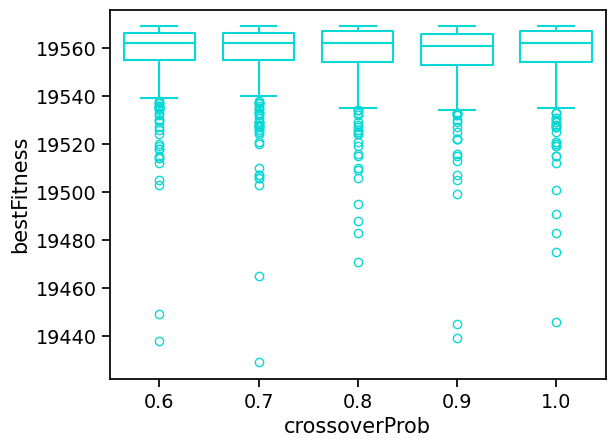

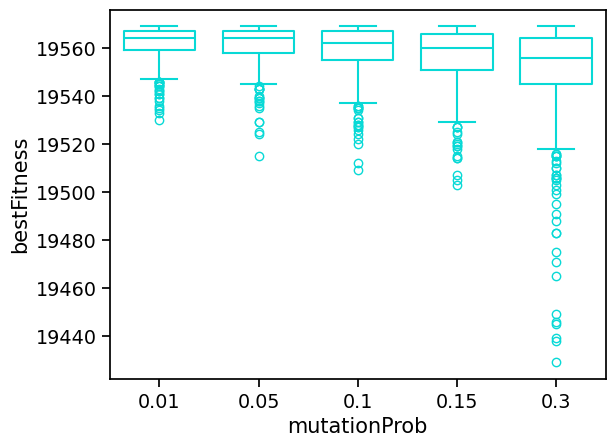

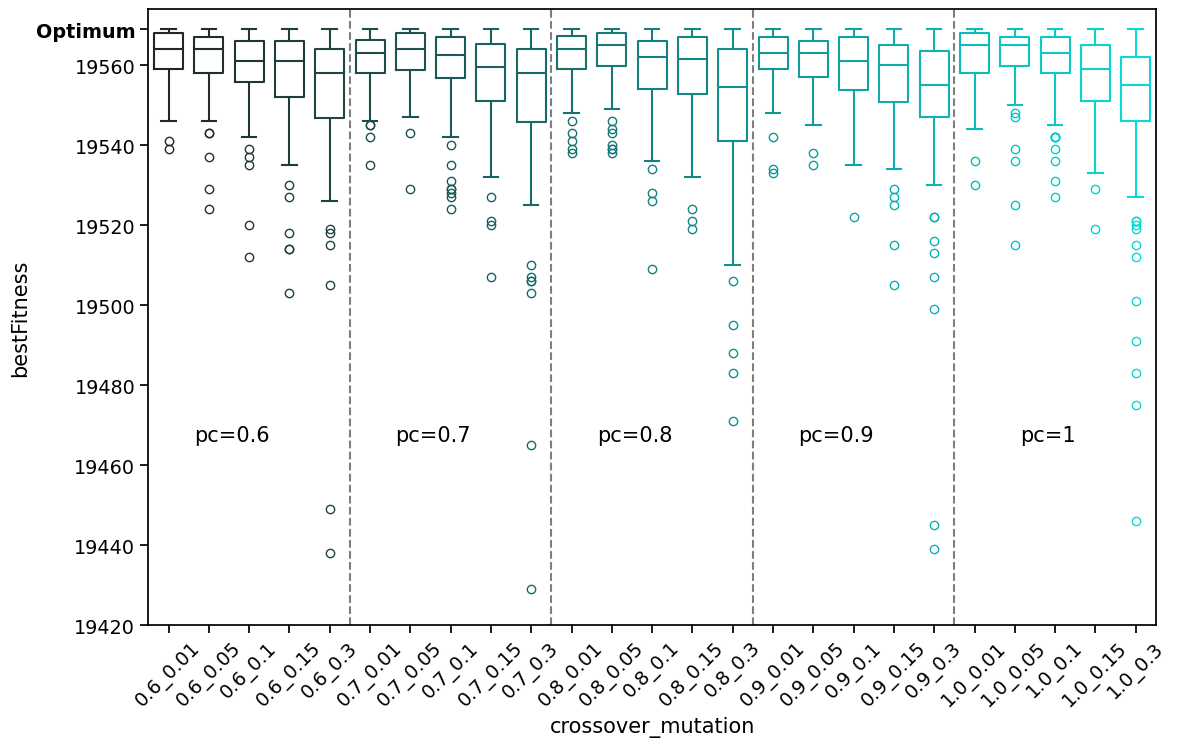

In [10]:
generate_all_plots(
    data_small, 19569, y_upper_lim=19574, crossover_text_y=19470, color="#08D9D6"
)
colors = ["#08D9D6", "#252A34", "#FF2E63"]

# Medium problem

In [11]:
data_medium = pd.read_csv("./results/s200_results.csv")
data_medium["crossover_mutation"] = (
    data_medium["crossoverProb"].astype(str)
    + "_"
    + data_medium["mutationProb"].astype(str)
)
data_medium

,problem,crossoverProb,mutationProb,nMutatedGenes,maxISteps,execution,nGenerations,nFitnessEvaluations,bestFitness,crossover_mutation
0,./problems/s200,0.6,0.005,1,1000,0,-1,1100,43956.0,0.6_0.005
1,./problems/s200,0.6,0.005,1,1000,1,-1,1100,43955.0,0.6_0.005
2,./problems/s200,0.6,0.005,1,1000,2,-1,1100,43951.0,0.6_0.005
3,./problems/s200,0.6,0.005,1,1000,3,-1,1100,43956.0,0.6_0.005
4,./problems/s200,0.6,0.005,1,1000,4,-1,1100,43958.0,0.6_0.005
...,...,...,...,...,...,...,...,...,...,...
2495,./problems/s200,1.0,0.150,30,1000,95,-1,1100,43959.0,1.0_0.15
2496,./problems/s200,1.0,0.150,30,1000,96,-1,1100,43926.0,1.0_0.15
2497,./problems/s200,1.0,0.150,30,1000,97,-1,1100,43924.0,1.0_0.15
2498,./problems/s200,1.0,0.150,30,1000,98,-1,1100,43958.0,1.0_0.15


In [12]:
data_medium.groupby("crossoverProb").agg({"bestFitness": ["mean", "std", "min", "max"]})

bestFitness                            
                     mean       std      min      max
crossoverProb                                        
0.6             43953.716  6.083203  43918.0  43959.0
0.7             43953.776  5.937367  43921.0  43959.0
0.8             43953.418  6.161103  43918.0  43959.0
0.9             43953.632  5.910198  43925.0  43959.0
1.0             43953.144  6.380336  43921.0  43959.0

In [13]:
data_medium.groupby("mutationProb").agg({"bestFitness": ["mean", "std", "min", "max"]})

bestFitness                            
                    mean       std      min      max
mutationProb                                        
0.005          43955.198  4.582225  43925.0  43959.0
0.025          43954.806  4.537570  43934.0  43959.0
0.050          43953.268  5.961817  43926.0  43959.0
0.075          43953.114  6.207259  43924.0  43959.0
0.150          43951.300  7.798695  43918.0  43959.0

/var/folders/0z/7vymhdc940g5b2hqyh7t09480000gq/T/ipykernel_99766/4219300410.py:10: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#50B498'` for the same effect.

  sns.boxplot(
/var/folders/0z/7vymhdc940g5b2hqyh7t09480000gq/T/ipykernel_99766/4219300410.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


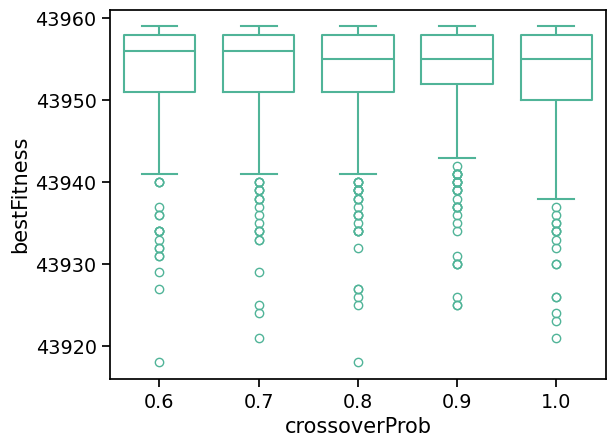

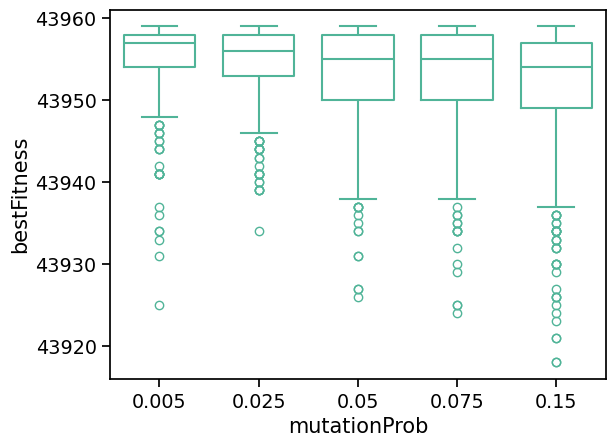

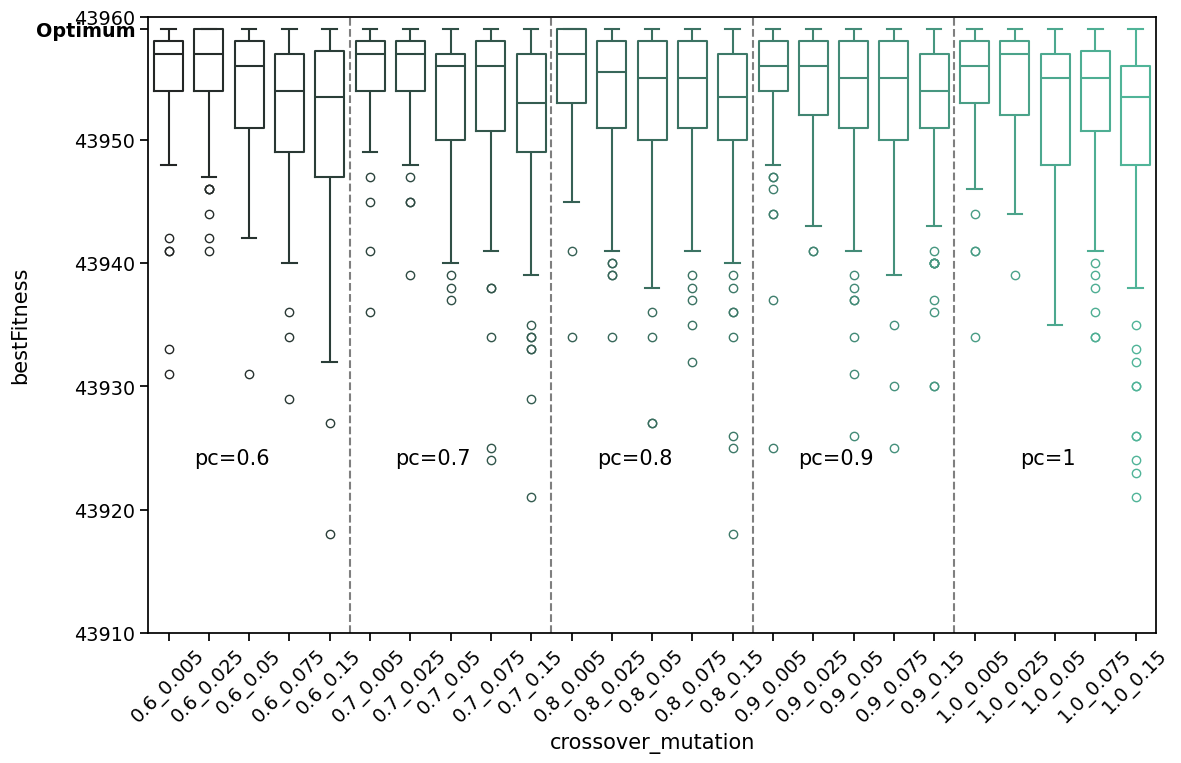

In [14]:
generate_all_plots(
    data_medium,
    optimum=43959,
    y_upper_lim=43960,
    crossover_text_y=43925,
    # palette="flare_r",
    color="#50B498",
)
colors = ["#08D9D6", "#252A34", "#FF2E63"]

# Big problem

In [15]:
data_big = pd.read_csv("./results/s300_results.csv")
data_big["crossover_mutation"] = (
    data_big["crossoverProb"].astype(str) + "_" + data_big["mutationProb"].astype(str)
)
data_big

,problem,crossoverProb,mutationProb,nMutatedGenes,maxISteps,execution,nGenerations,nFitnessEvaluations,bestFitness,crossover_mutation
0,./problems/s300,0.6,0.003333,1,1500,0,-1,1600,78682.0,0.6_0.003333
1,./problems/s300,0.6,0.003333,1,1500,1,-1,1600,78681.0,0.6_0.003333
2,./problems/s300,0.6,0.003333,1,1500,2,-1,1600,78682.0,0.6_0.003333
3,./problems/s300,0.6,0.003333,1,1500,3,-1,1600,78679.0,0.6_0.003333
4,./problems/s300,0.6,0.003333,1,1500,4,-1,1600,78682.0,0.6_0.003333
...,...,...,...,...,...,...,...,...,...,...
2495,./problems/s300,1.0,0.100000,30,1500,95,-1,1600,78670.0,1.0_0.1
2496,./problems/s300,1.0,0.100000,30,1500,96,-1,1600,78668.0,1.0_0.1
2497,./problems/s300,1.0,0.100000,30,1500,97,-1,1600,78681.0,1.0_0.1
2498,./problems/s300,1.0,0.100000,30,1500,98,-1,1600,78680.0,1.0_0.1


In [16]:
data_big.groupby("crossoverProb").agg({"bestFitness": ["mean", "std", "min", "max"]})

bestFitness                            
                     mean       std      min      max
crossoverProb                                        
0.6             78678.688  3.788319  78659.0  78682.0
0.7             78678.178  4.545728  78635.0  78682.0
0.8             78677.978  4.602595  78654.0  78682.0
0.9             78678.148  4.876644  78630.0  78682.0
1.0             78677.684  4.937297  78650.0  78682.0

In [17]:
data_big.groupby("mutationProb").agg({"bestFitness": ["mean", "std", "min", "max"]})

bestFitness                            
                    mean       std      min      max
mutationProb                                        
0.003333       78679.600  2.871322  78660.0  78682.0
0.016667       78678.742  3.810048  78656.0  78682.0
0.033333       78678.222  4.114191  78653.0  78682.0
0.050000       78677.778  4.581123  78654.0  78682.0
0.100000       78676.334  6.189917  78630.0  78682.0

/var/folders/0z/7vymhdc940g5b2hqyh7t09480000gq/T/ipykernel_99766/4219300410.py:10: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#FF2E63'` for the same effect.

  sns.boxplot(
/var/folders/0z/7vymhdc940g5b2hqyh7t09480000gq/T/ipykernel_99766/4219300410.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


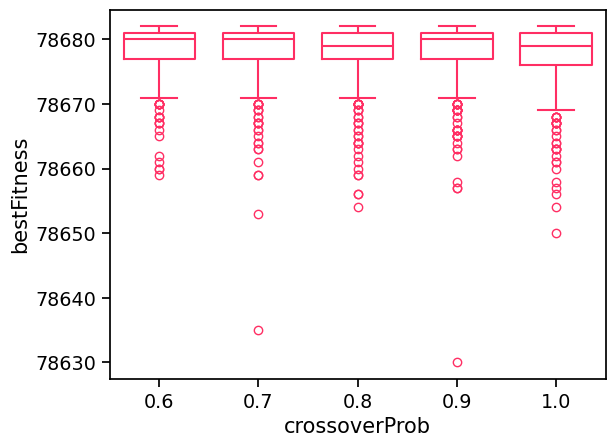

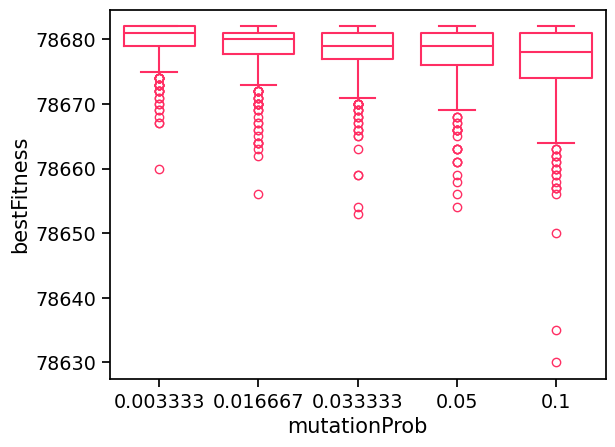

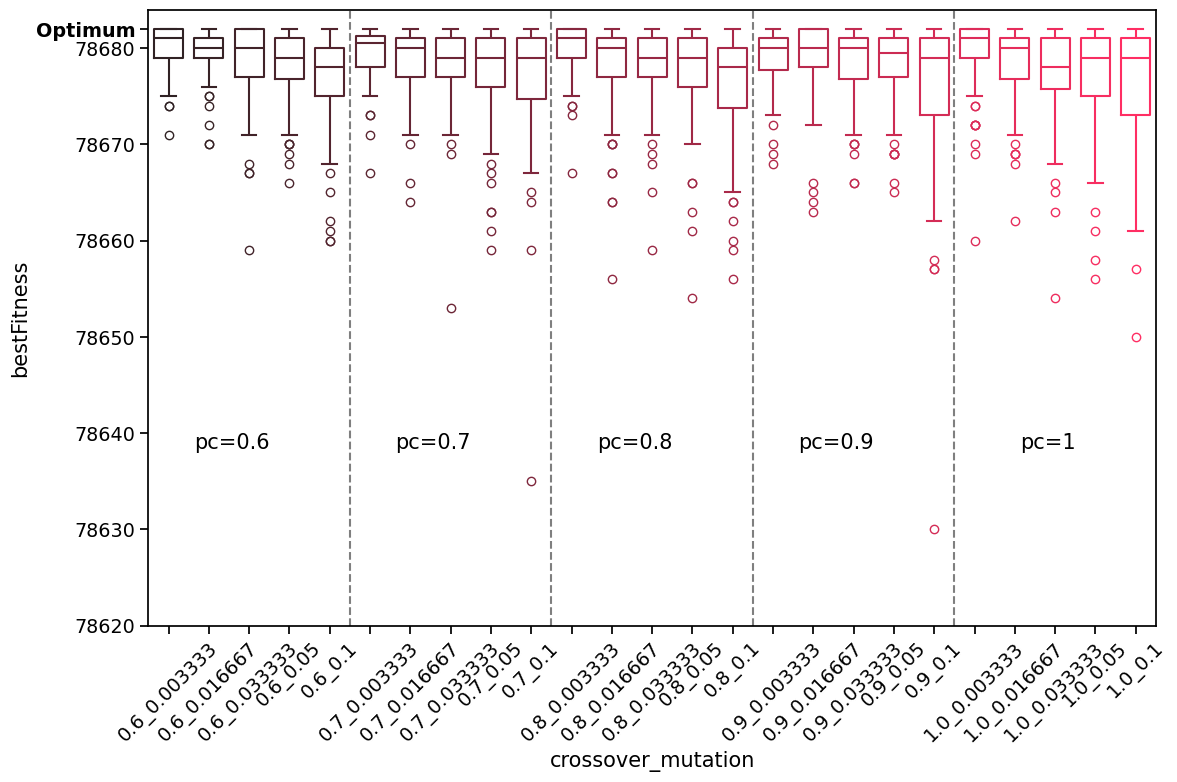

In [18]:
generate_all_plots(
    data_big,
    optimum=78682,
    y_upper_lim=78684,
    crossover_text_y=78640,
    # palette="viridis",
    color="#FF2E63",
)
colors = ["#08D9D6", "#252A34", "#FF2E63"]